예측 결과 : [1. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


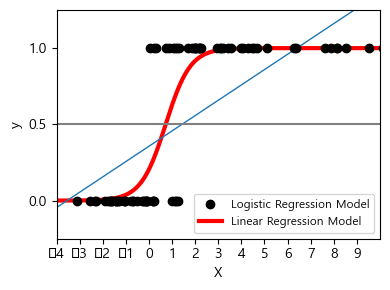

<Figure size 800x600 with 0 Axes>

In [149]:
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn import linear_model

# plot을 그려주는 함수입니다.
def plot_logistic_regression(model, X_data, y_data):
    # and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)
    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()
    plt.savefig('log_image.png')

# 데이터를 생성하고 반환하는 함수입니다.
def load_data():
    
    np.random.seed(0)
    
    X = np.random.normal(size = 100)
    y = (X > 0).astype(np.float64)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size = 100)
    X = X[:, np.newaxis]
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
    
    return train_X, test_X, train_y, test_y
"""
1. 로지스틱 회귀 모델을 구현하고, 
   학습 결과를 확인할 수 있는 main() 함수를 완성합니다. 
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    logistic_model = LogisticRegression()
    
    logistic_model.fit(train_X,train_y)
    
    predicted = logistic_model.predict(test_X)
    
    # 예측 결과 확인하기 
    print("예측 결과 :", predicted[:10])
    
    plot_logistic_regression(logistic_model, train_X, train_y)
    
    return logistic_model

if __name__ == "__main__":
    main()

모델 정확도: 95.105%


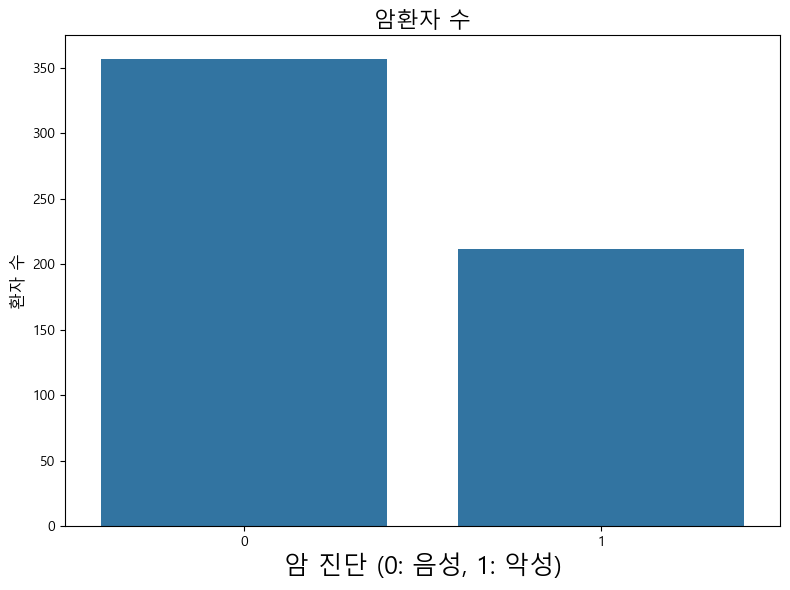

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

def plot_logistic_regression_curve(df):
   plt.rc('figure', figsize=(8, 6))
   plt.rc('font',family='Malgun Gothic')
   sns.countplot(data=df, x='diagnosis')

   # 그래프에 제목과 레이블 추가
   plt.title('암환자 수', fontsize=16)
   plt.xlabel('암 진단 (0: 음성, 1: 악성)', fontsize=18)
   plt.ylabel('환자 수', fontsize=12)

   plt.tight_layout()
   plt.show()

def main():
    
    df = pd.read_csv('data.csv')

    df.drop('Unnamed: 32',axis= 1, inplace= True) #값이 없는 Unnamed: 32 특성 삭제

    X= df.drop(['id','diagnosis'], axis = 1) # 라벨인 diagnosis와 암 진단과 상관없는 특성 id 드랍후 X에 저장

    df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1, 0) # np.where 을 통해 실수가 아닌 diagnosis를 'M'이면 1, 아니면 0으로 변환

    y= df['diagnosis']

    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state= 0) 

    logistic_model = LogisticRegression() #모델 객체 생성 
    
    logistic_model.fit(train_X,train_y) 

    predicted = logistic_model.predict(test_X) # test_X, 즉 테스트 데이터를 모델에 넣어서 예측

    accuracy = accuracy_score(test_y, predicted) # accuracy_score함수 사용해 예측한 predicted값과 테스트 라벨 대조 
    print(f"모델 정확도: {accuracy * 100:.3f}%") # 0~1 범위로 나오기 때문에 100 곱하기 

    plot_logistic_regression_curve(df)
    

if __name__ == "__main__":
    main()


In [152]:
df = pd.read_csv('data.csv')
print(df.isnull().any())
print(df.isnull().any().sum())

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w